<a href="https://colab.research.google.com/github/madhukarbura/MYPROJECTS/blob/main/imageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [35]:
image = cv2.imread('/content/gods-shiva-3d-wallpaper-preview.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

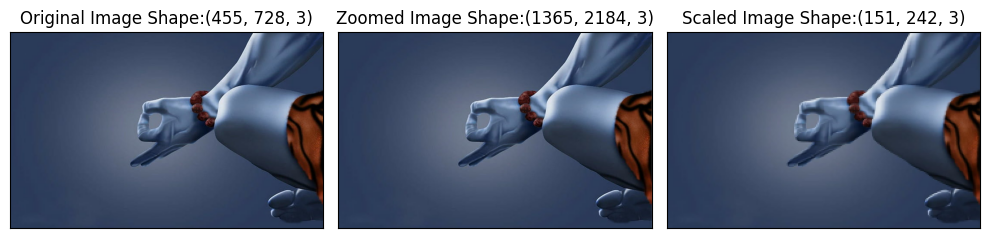

In [36]:
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # Define the scale factor
# Increase the size by 3 times
scale_factor_1 = 3.0
# Decrease the size by 3 times
scale_factor_2 = 1/3.0
# Get the original image dimensions
height, width = image_rgb.shape[:2]
# Calculate the new image dimensions
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)
# Resize the image
zoomed_image = cv2.resize(src =image_rgb,

                          dsize=(new_width, new_height),

                          interpolation=cv2.INTER_CUBIC)


# Calculate the new image dimensions
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)
# Scaled image
scaled_image = cv2.resize(src= image_rgb,

                          dsize =(new_width1, new_height1),

                          interpolation=cv2.INTER_AREA)
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:'+str(image_rgb.shape))
# Plot the Zoomed Image
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:'+str(zoomed_image.shape))
# Plot the Scaled Image
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:'+str(scaled_image.shape))
# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
# Display the subplots
plt.tight_layout()
plt.show()

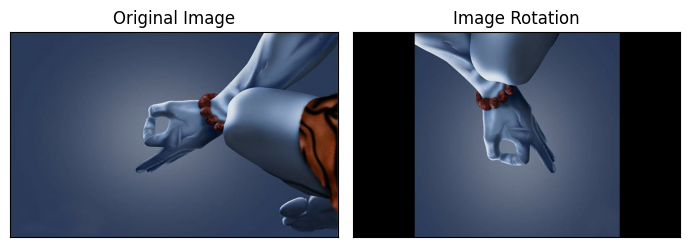

In [38]:
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 90
scale = 1
# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (image.shape[1], image.shape[0]))
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')
# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
# Display the subplots
plt.tight_layout()
plt.show()

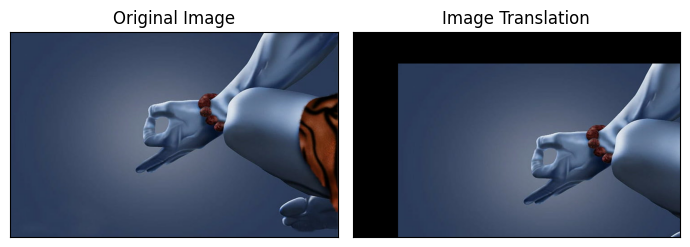

In [39]:
width = image_rgb.shape[1]
height = image_rgb.shape[0]
tx = 100
ty = 70
# Translation matrix
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
# warpAffine does appropriate shifting given the Translation matrix.
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
# Plot the transalted image
axs[1].imshow(translated_image)
axs[1].set_title('Image Translation')
# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
# Display the subplots
plt.tight_layout()
plt.show()

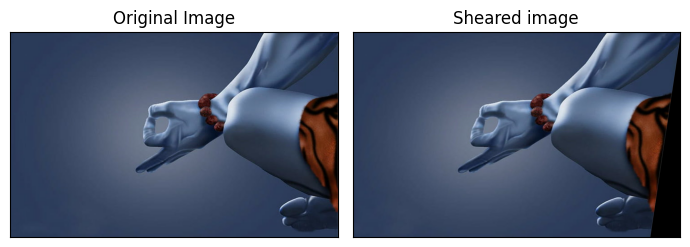

In [40]:
width = image_rgb.shape[1]
height = image_rgb.shape[0]
# Define the Shearing factor
shearX = -0.15
shearY = 0
# Define the Transformation matrix for shearing
transformation_matrix = np.array([[1, shearX, 0],

                                  [0, 1, shearY]], dtype=np.float32)
# Apply shearing
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
# Plot the Sheared image
axs[1].imshow(sheared_image)
axs[1].set_title('Sheared image')
# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
# Display the subplots
plt.tight_layout()
plt.show()

[[0.16532258 0.16532258 0.16532258 ... 0.08064516 0.05645161 0.28629032]
 [0.16532258 0.16532258 0.16532258 ... 0.08064516 0.0483871  0.26209677]
 [0.16129032 0.16129032 0.16129032 ... 0.09274194 0.05241935 0.24596774]
 ...
 [0.16532258 0.16935484 0.1733871  ... 0.1733871  0.10887097 0.2983871 ]
 [0.16532258 0.16935484 0.1733871  ... 0.1733871  0.10887097 0.2983871 ]
 [0.16532258 0.16935484 0.1733871  ... 0.1733871  0.10887097 0.2983871 ]]


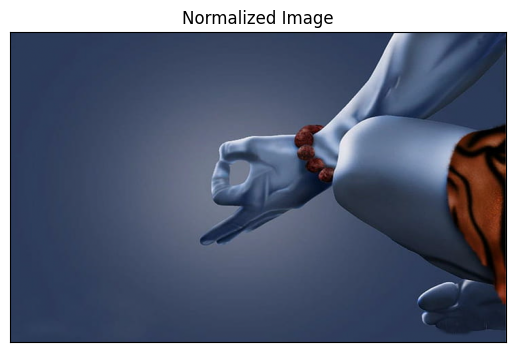

In [41]:
b, g, r = cv2.split(image_rgb)
# Normalization parameter
min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX
# Normalize each channel
b_normalized = cv2.normalize(b.astype('float'), None, min_value, max_value, norm_type)
g_normalized = cv2.normalize(g.astype('float'), None, min_value, max_value, norm_type)
r_normalized = cv2.normalize(r.astype('float'), None, min_value, max_value, norm_type)
# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
# Normalized image
print(normalized_image[:,:,0])
plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()

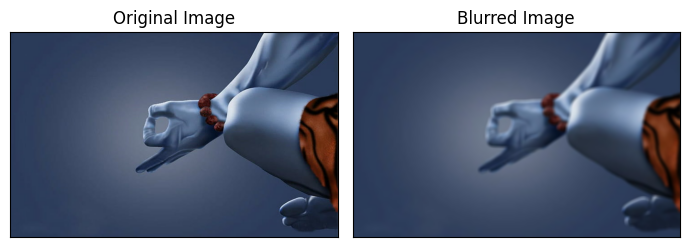

In [42]:
 # Apply Gaussian blur
blurred = cv2.GaussianBlur(image, (9, 9), 5)
# Convert blurred image to RGB
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
# Plot the blurred image
axs[1].imshow(blurred_rgb)
axs[1].set_title('Blurred Image')
# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
# Display the subplots
plt.tight_layout()
plt.show()

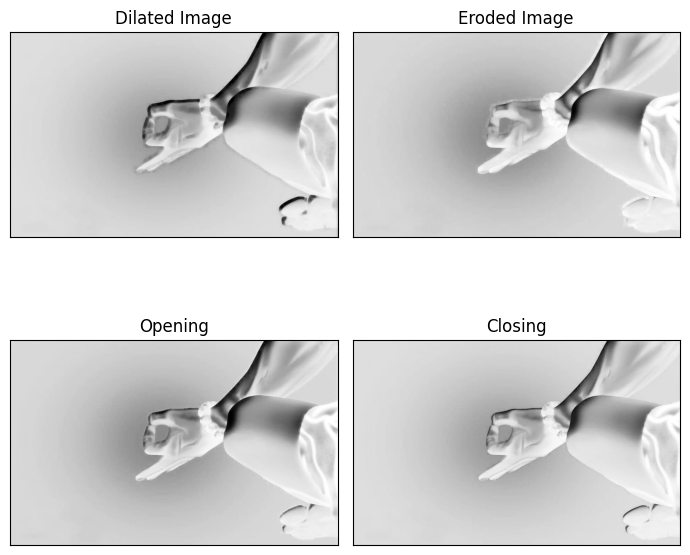

In [43]:
# Create a structuring element
kernel = np.ones((3, 3), np.uint8)
# Perform dilation
dilated = cv2.dilate(image_gray, kernel, iterations=2)
# Perform erosion
eroded = cv2.erode(image_gray, kernel, iterations=2)
# Perform opening (erosion followed by dilation)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
# Perform closing (dilation followed by erosion)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
# Plot the Dilated Image
axs[0,0].imshow(dilated, cmap='Greys')
axs[0,0].set_title('Dilated Image')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
# Plot the Eroded Image
axs[0,1].imshow(eroded, cmap='Greys')
axs[0,1].set_title('Eroded Image')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
# Plot the opening (erosion followed by dilation)
axs[1,0].imshow(opening, cmap='Greys')
axs[1,0].set_title('Opening')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
# Plot the closing (dilation followed by erosion)
axs[1,1].imshow(closing, cmap='Greys')
axs[1,1].set_title('Closing')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
# Display the subplots
plt.tight_layout()
plt.show()